# Tarea 2 Pipeline
## @Author Daniel Vallejo Aldana

In [1]:
import utils 
import StructElements as se
import gamafil as gmf
import matplotlib.pyplot as plt
import cv2
import numpy as np

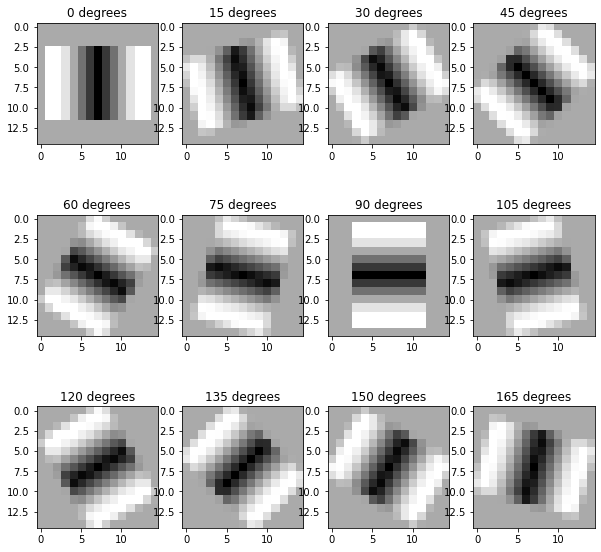

In [2]:
#Visualización de todos los filtros gaussianos que estamos calculando
fig, ax=plt.subplots(3,4,figsize=(10,10))
contador=0
for i in range(3):
    for j in range(4):
        rot=gmf.Rotate(iteration=contador)
        ax[i][j].imshow(rot,cmap='gray')
        ax[i][j].set_title(str(15*contador)+' degrees')
        contador+=1

In [3]:
toTest=utils.Query(89)

Text(0.5, 1.0, 'Morphological SE Disk MAT')

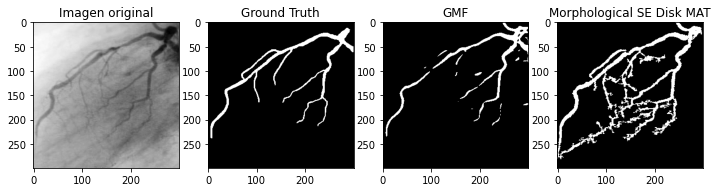

In [4]:
disco=se.Disk(shape=(19,19))
img=se.EQMethod(toTest[0],disco,iterations=100,filtro='adapt',gt=toTest[1],read_binary=True)
fig,ax=plt.subplots(1,4,figsize=(12,20))
imagen=cv2.imread(toTest[0],0)
gt=cv2.imread(toTest[1],0)
imc=gmf.GMF(toTest[0])
ax[0].imshow(imagen,cmap='gray')
ax[0].set_title("Imagen original")
ax[1].imshow(gt,cmap='gray')
ax[1].set_title("Ground Truth")
ax[2].imshow(imc,cmap='gray')
ax[2].set_title("GMF")
ax[3].imshow(img,cmap='gray')
ax[3].set_title("Morphological SE Disk MAT")

# Evaluación sobre los conjuntos de entrenamiento y prueba

In [5]:
disco=se.Disk(shape=(19,19))
TRAIN,TEST=utils.train_test_split()

# Conjunto de entrenamiento

In [6]:
gaussmet=np.zeros(5)
morphmet=np.zeros(5)
proc=0
for t in TRAIN:
    morph=se.EQMethod(t[0],disco,iterations=100,filtro='adapt',gt=t[1],read_binary=True)
    gauss=gmf.GMF(t[0])
    real=cv2.imread(t[1],0)
    try:
        mm=se.EvaluateMetrics(morph,real,asdict=False)
        gm=se.EvaluateMetrics(gauss,real,asdict=False)
        gaussmet=gaussmet+gm
        morphmet=morphmet+mm
        proc+=1
    except:
        pass
print("Filtro morfológico")
print(np.round(morphmet/proc,decimals=3))
print("Filtro de Gauss")
print(np.round(gaussmet/proc,decimals=3))

Filtro morfológico
[0.905 0.792 0.987 0.383 0.723]
Filtro de Gauss
[0.952 0.467 0.969 0.338 0.779]


# Conjunto de prueba

In [7]:
gaussmet=np.zeros(5)
morphmet=np.zeros(5)
proc=0
for t in TEST:
    morph=se.EQMethod(t[0],disco,iterations=100,filtro='adapt',gt=t[1],read_binary=True)
    gauss=gmf.GMF(t[0])
    real=cv2.imread(t[1],0)
    try:
        mm=se.EvaluateMetrics(morph,real,asdict=False)
        gm=se.EvaluateMetrics(gauss,real,asdict=False)
        gaussmet=gaussmet+gm
        morphmet=morphmet+mm
        proc+=1
    except:
        pass
print("Filtro morfológico")
print(np.round(morphmet/proc,decimals=3))
print("Filtro de Gauss")
print(np.round(gaussmet/proc,decimals=3))

Filtro morfológico
[0.916 0.847 0.99  0.426 0.731]
Filtro de Gauss
[0.95  0.484 0.97  0.346 0.777]
